In [1]:
# colab 한글깨짐 해결위한 설치
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155219 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
# matplotlib 설정
from matplotlib import pyplot as plt
from matplotlib import rc

%matplotlib inline

# # mac OS 한글 깨짐 해결
# rc('font', family = 'AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

# colab 한글이 깨짐 해결
from matplotlib import font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
fm._rebuild()

# 런타임 다시 시작해야 한글 깨짐 해결가능!!!!

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Decision Tree

Decision Tree(결정트리)
* 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내어 이를 바탕으로 데이터를 분할 --> 분류(classification) or 회귀(regression) 분석을 수행한다.
* 균일한(`엔트로피` 또는 `지니 계수`가 낮은) 데이터 세트로 분할할 수 있도록 규칙을 찾는다.
* 피처 스케일링, 정규화 등의 전처리가 필요 없는 장점이 있다.
* 반면, 과적합이 잘 일어난다는 단점이 있다.
* 분류, 회귀가 모두 가능하다.
  * `분류`: leaf에 놓인 데이터들의 최빈값을 예측값으로 한다.
  * `회귀`: leaf 노드에 놓인 데이터들의 평균값을 예측값으로 한다.

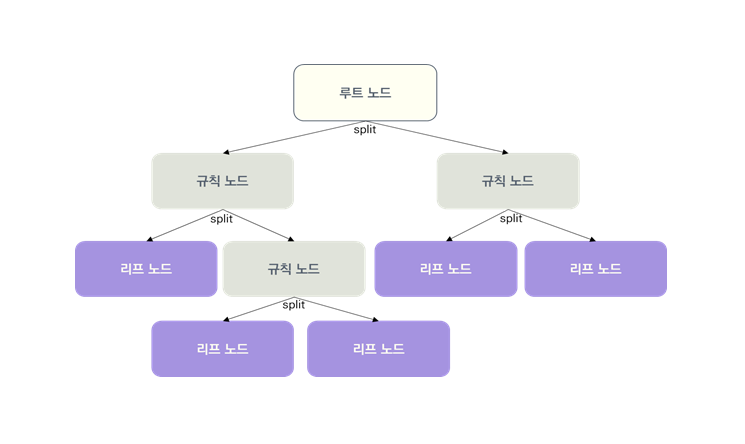

노드
* `규칙 노드`: 규칙 조건
* `리프 노드`: 결정된 클래스 값

엔트로피

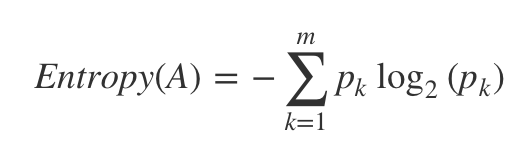

## 1) Decison Tree Classifier

* decision tree 분류 예시

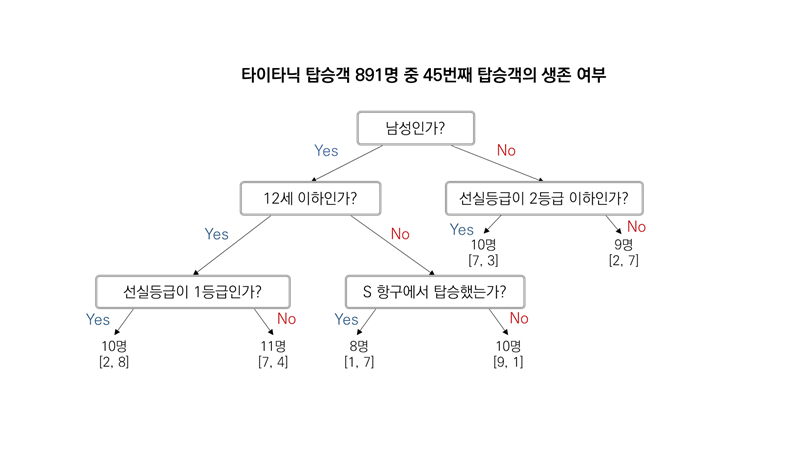

### 1-1. 붓꽃 데이터 생성

붓꽃(iris) 꽃잎, 꽃받침의 너비와 길이를 측정한 데이터이며 150개의 샘플로 구성되어 있으며 3개의 레이블 클래스를 가진다.

feature  
* `sepal length` : 꽃받침의 길이
* `sepal width` : 꽃받침의 너비
* `petal length` : 꽃잎의 길이
* `petal width` : 꽃잎의 너비


<a title="No machine-readable author provided. Dlanglois assumed (based on copyright claims)., CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Iris_versicolor_3.jpg"><img width="512" alt="Iris versicolor 3" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/512px-Iris_versicolor_3.jpg"></a>  

<a href="https://commons.wikimedia.org/wiki/File:Iris_versicolor_3.jpg">No machine-readable author provided. Dlanglois assumed (based on copyright claims).</a>, <a href="http://creativecommons.org/licenses/by-sa/3.0/">CC BY-SA 3.0</a>, via Wikimedia Commons

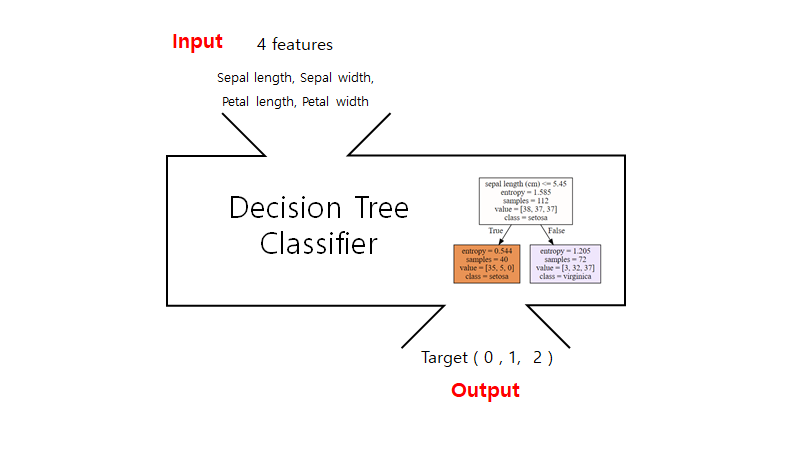

In [4]:
# 라이브러리 import
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
# 질문을 던진 후 partition이 어떻게 됬는지 시각화 라이브러리
from sklearn.tree import export_graphviz
import graphviz

from sklearn.metrics import classification_report

In [5]:
# iris data를 불러온 후, iris 변수에 담아보자.
iris = load_iris()

In [6]:
# iris data를 학습용과 검증용 데이터 세트로 분리해보자.
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2], iris.target,
                                                   stratify = iris.target,
                                                   shuffle = True, random_state=11)
# 시각화를 위해서 특성을 2개만 사용하였다. --> iris.data[:, :2]

In [7]:
# X 데이터의 sample 수가 각각 112, 38개 & feature 수가 2개인 것을 확인할 수 있다.
X_train.shape, X_test.shape

((112, 2), (38, 2))

In [8]:
# iris data의 전체 feature에는 무엇이 있는지 조회해보자.
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
# X_train을 데이터프레임으로 변환하여보자.feature가 2개만 포함된 것을 알 수 있다.
X_train_df = pd.DataFrame(X_train, columns = iris.feature_names[:2])
X_train_df.head()

,sepal length (cm),sepal width (cm)
0,5.0,3.5
1,6.7,3.1
2,7.6,3.0
3,5.0,3.0
4,6.2,3.4


### 1-2. Decision Tree Classifer 모델 생성 및 시각화

`DecisionTreeClassifier(ciriterion, min_samples_split, min_samples_leaf, max_features, max_depth, max_leaf_nodes)`
* 사이킷런에서 제공하는 트리 기반의 분류 모델

주요 parameter:
* `criterion`: 정보 균일도 측정 방법(gini/entropy), (기본 값="gini"), information gain을 계산하는 방식 
* `min_samples_split`: 분할 되기 위해 필요한 최소한의 샘플 데이터 수, (기본 값=2)
* `min_samples_leaf`: 노드가 되기 위해 필요한 최소한의 데이터 수, (기본 값=1)
* `max_features`: 분할 시 고려해야 할 최대 피처 개수, (기본 값=None)
* `max_depth`: 트리의 최대 깊이, (기본 값=None)
* `max_leaf_nodes`: 말단 노드의 개수, (기본 값=None)

'min_samples_split', 'min_samples_leaf', 'max_depth'는 과적합을 제어하는 데에 사용되는 parameter이다. (깊이를 제한함)

- max_features : 전체 feature중에 몇개의 feature를 사용해서 질문할지를 랜덤하게 선택

참고: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [13]:
# 결정트리분류 모델을 로드한 후 학습시켜보자.
# max_depth =1 질문을 1개 던져서 꽃의 종을 파악하겠다
model_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1, 
                                  random_state = 0).fit(X_train, y_train)

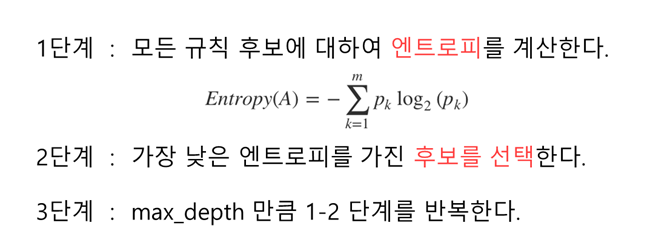

`export_graphviz(decision_tree, out_file, class_names, feature_names, filled)`
- tree모듈에 export_graphviz를 이용하여 결정트리를 시각화할 수 있다.  
- Max feature를 none값일 경우에는 모든 규칙 후보에 대하여 엔트로피를 계산

주요 parameter:
* `decision_tree`: 시각화할 트리 모델
* `out_file`: 저장될 파일의 이름과 형식, (기본 값 = None)  
* `class_names`: 클래스 이름 설정, (기본 값 = None) 
* `feature_names`: 특성의 이름을 설정, (기본 값 = None) 
* `filled`:노드의 클래스를 구분하기 위한 컬러링 (기본 값 = False) 

참고: https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

In [16]:
# 학습된 모델을 시각화하여 저장해보자.
export_graphviz(model_dt, out_file = 'tree.dot', class_names = iris.target_names,
               feature_names = iris.feature_names[:2], filled = True)

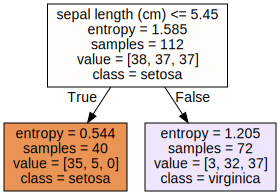

In [17]:
# 'tree.dot'으로 저장된 그래프를 로드해보자.

with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# 앞서 모델의 max_depth를 1로 설정해두었기 때문에 split이 1번만 일어난 것을 확인할 수 있다.
# 현재 38,37 섞여 있는 불순도가 높은 상태며 가장 많은 것은 setosa (setosa 3개, virgicolor 32, vergicaviginica 27)
# leaf 노드의 다수를 차지하는 것으로 새로운 데이터를 들어 왔을때 질문을 던졌을 때의 리프 노드의 비중이 큰것으로 예측한다. (디스전 트리는 확률 모형임)

### 1-3. 과적합 제어

- Decision Tree에서는 일반적으로 훈련을 할 떄 제약사항이 없다. 그래서 훈련을 시키면 훈련 데이터에 아주 가깝게 맞추려고 한다. 그러면 자연스럽게 모델은 과적합이 된다. 그래서 트리가 깊어지는 것을 막기 위한 가지치기 작업들이 필요한데 사이킷런에는 과적합을 방지하기위한 파라미터들이 존재한다.  
  
  1. max_depth는 트리의 최대 깊이를 제어할 수 있는 명령어다.  
  2. min_sample_split은 분할되기 위해 노드가 가져야할 최소 샘플 수를 지정한다. (기본값=2)  
  3. min_samples_leaf는 리프노드가 가지고 있어야할 최소 샘플 수를 지정한다. (기본값=1)  
  4. max_feature는 각 노드에서 분할시 사용할 특성의 최대 수를 지정한다.  
  5. max_leaf_node는 리프노드의 최대 수를 지정한다.  

#### max_depth

In [18]:
# max_depth별로 score가 어떻게 변하는지 조회해보자.
max_depths = [1,2,3,4,5,6,7,8,9,10]
for depth in max_depths:
    model_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = depth, random_state=0).fit(X_train, y_train)
    pred = model_dt.predict(X_test)
    accuracy = model_dt.score(X_test, y_test)
    print('max_depth = {0}  score: {1:3f}'.format(depth, accuracy))
#max_depth=7에서 그나마 가장 좋은 성능을 보인다.
# max_depth = 7 이상부터 과적합 예상
# max_depth를 1부터 대입해봐야 좋은 성능인 max_depth를 확인할 수 있음

max_depth = 1  score: 0.578947
max_depth = 2  score: 0.631579
max_depth = 3  score: 0.710526
max_depth = 4  score: 0.710526
max_depth = 5  score: 0.710526
max_depth = 6  score: 0.710526
max_depth = 7  score: 0.789474
max_depth = 8  score: 0.736842
max_depth = 9  score: 0.736842
max_depth = 10  score: 0.657895


* max_depth = 1, 10으로 설정된 모델을 더 자세히 살펴보자.

In [19]:
# max_depth = 1으로 설정하여 모델을 생성한 뒤 학습시켜보자.
model_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1, 
                                  random_state=0).fit(X_train, y_train)

# max_depth를 1로 설정한 모델이 underfit되어 낮은 예측성능을 보이고 있다.


print('train score : {:.3f}'.format(model_dt.score(X_train, y_train)))
print('test score : {:.3f}'.format(model_dt.score(X_test, y_test)))

pred = model_dt.predict(X_test)
print('분류 report:\n', classification_report(y_test, pred))


train score : 0.643
test score : 0.579
분류 report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.00      0.00      0.00        13
           2       0.46      0.92      0.62        13

    accuracy                           0.58        38
   macro avg       0.43      0.59      0.48        38
weighted avg       0.42      0.58      0.47        38



In [20]:
# max_depth=1로 트리 생성 조건을 제약한 결정 경계를 시각화해보자.
def model_border(model, X, y, contour=True):
    xmin = X[:, 0].min()
    xmax = X[:, 0].max()
    ymin = X[:, 1].min()
    ymax = X[:, 1].max()
    xminmax = np.arange(xmin, xmax, .02)
    yminmax = np.arange(ymin, ymax, .02)
    X1, X2 = np.meshgrid(xminmax, yminmax)
    X_pred = np.c_[X1.ravel(), X2.ravel()]
    Z = model.predict(X_pred).reshape(X1.shape)
    plt.figure(figsize = (10, 5))
    plt.contourf(X1, X2, Z, alpha=0.3)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", alpha=0.5)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=0.5)
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "y^", alpha=0.5)
    plt.xlim([4.4, 7.6])
    plt.ylim([2, 4.0])
    plt.xlabel("X_sepal_length")
    plt.ylabel("X_sepal_width")

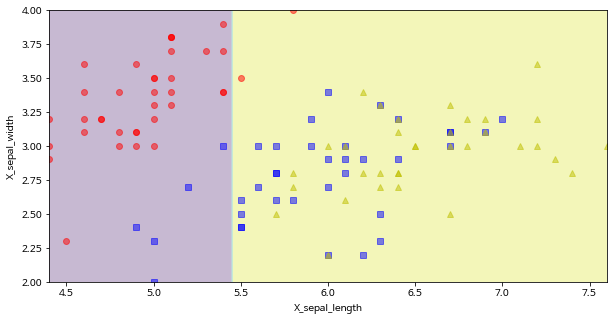

In [21]:
model_border(model_dt, X_train, y_train)
#결정트리의 경계가 제대로 형성되지 않은 것을 볼 수 있다.

In [22]:
# max_depth = 10으로 설정하여 모델을 생성한 뒤 학습시켜보자.
model_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, 
                                  random_state=0).fit(X_train, y_train)

In [23]:
# max_depth = 10으로 설정한 모델을 시각화해보자.
from sklearn.tree import export_graphviz
export_graphviz(model_dt, out_file = 'tree_2.dot', class_names = iris.target_names,
               feature_names = iris.feature_names[:2], filled = True)

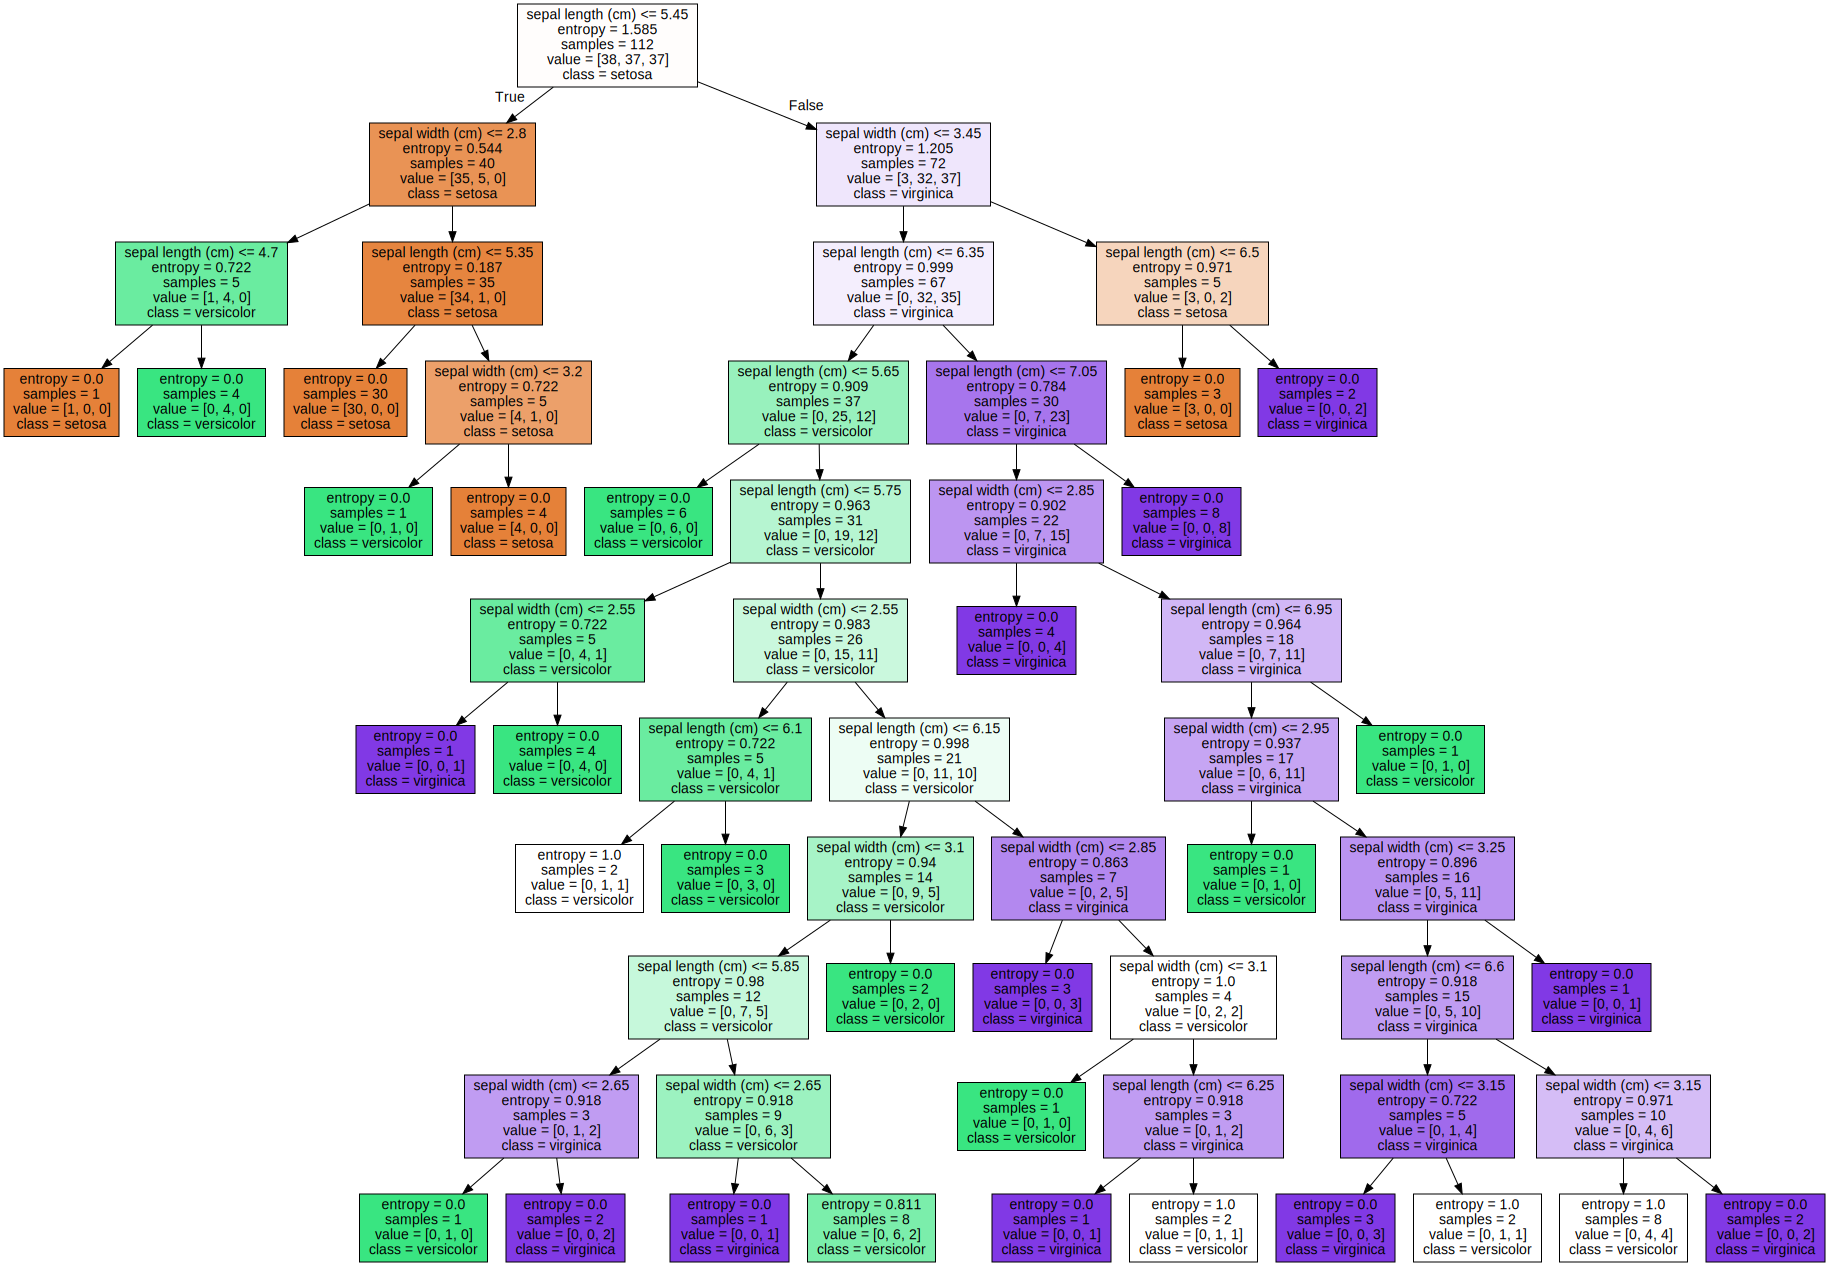

In [24]:
import graphviz

with open('tree_2.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# 분할 규칙이 더욱 세분화된 것을 확인할 수 있다.

In [25]:
# max_depth=10으로 설정한 모델의 성능을 조회해보자.

from sklearn.metrics import classification_report

print('train score : {:.3f}'.format(model_dt.score(X_train, y_train)))
print('test score : {:.3f}'.format(model_dt.score(X_test, y_test)))

pred = model_dt.predict(X_test)
print('분류 report:\n', classification_report(y_test, pred))

#max_depth를 10로 설정한 결과이다. 이전의 모델보다 깊게 설정한 결과 과적합이 발생하여 test에서 낮은 예측성능을 보인다.

train score : 0.920
test score : 0.658
분류 report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.50      0.62      0.55        13
           2       0.50      0.38      0.43        13

    accuracy                           0.66        38
   macro avg       0.67      0.67      0.66        38
weighted avg       0.66      0.66      0.65        38



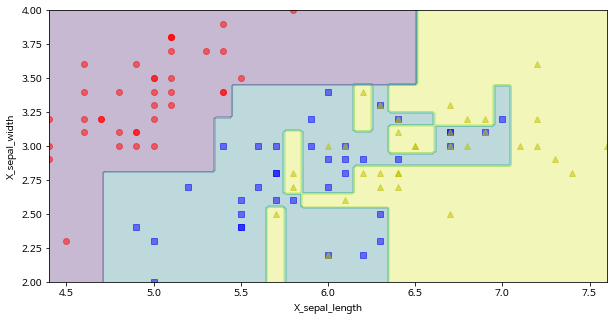

In [27]:
# max_depth=10로 트리 생성 조건을 제약한 결정 경계를 시각화해보자.
model_border(model_dt, X_train, y_train)

* 이전의 모델(max_depth=1)과 달리 max_depth를 10로 설정하였더니 결정트리의 경계가 더 많이 생성된 것을 볼 수 있다.

### 1-4. 특성 중요도

In [28]:
# 특성의 중요도(feature importance)를 살펴보기 위해 4가지 특성 전부를 사용했다.
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                   stratify = iris.target,
                                                   shuffle = True)
model_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, 
                                  random_state = 0).fit(X_train, y_train)

`feature_importances_`
* feature_importances_는 트리를 만들떄 특성이 얼마나 중요한지를 평가할 수 있는 명렁어이다.
* 0과 1사이의 값을 가지며, feature importance가 0인 특성은 예측에 전혀 사용되지 않았음을 뜻한다.

In [29]:
# 각 특성의 feature importance 조회해보자.
model_dt.feature_importances_

array([0.        , 0.01855462, 0.33606619, 0.64537919])

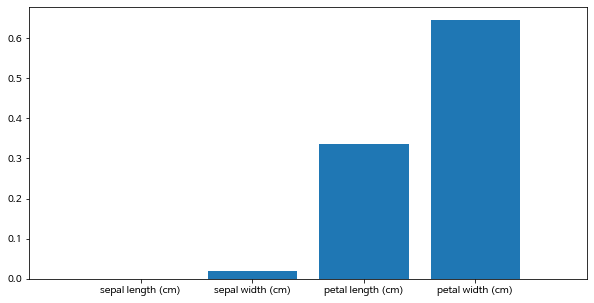

In [30]:
# feature importance를 그래프로 그려보자.
plt.figure(figsize = (10,5))
plt.bar(np.arange(iris.data.shape[1]), model_dt.feature_importances_)
plt.xticks(np.arange(iris.data.shape[1]), iris.feature_names)
plt.xlim(-1, iris.data.shape[1])
plt.show()

- sepal length특성은 트리 모델에서 전혀 사용되지 않았으며 가장 중요한 특성은 petal width이다.

## 2) Decision Tree Regressor

* decision tree 회귀 예시

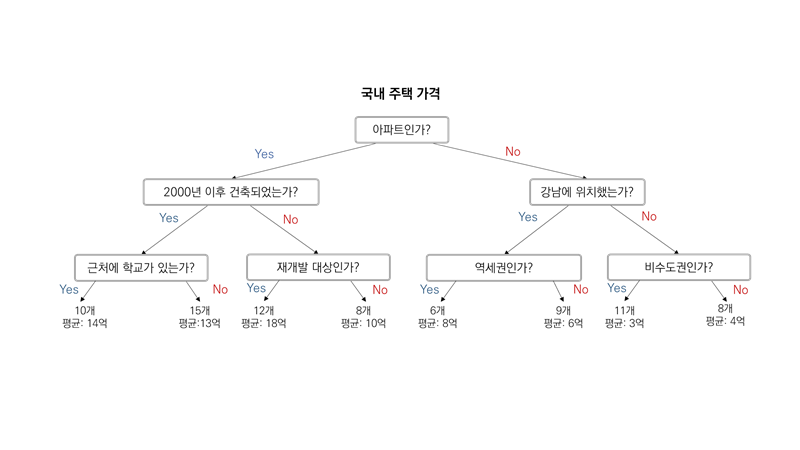

#### 2-1. 보스턴 주택 데이터 생성 

In [31]:
# 라이브러리 import
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

from sklearn.metrics import mean_squared_error

feature:

* `CRIM`: 지역별 범죄 발생률
* `ZN`: 25,000 평방피트를 초과하는 거주 지역의 비율
* `INDUS`: 비상업 지역 넓이 비율
* `CHAS`: 찰스강에 대한 더미 변수 (강의 경계에 위치할 시 1, 아닐 시 2)
* `NOX`: 일산화질소 농도
* `RM`: 거주할 수 있는 방 개수
* `AGE`: 1940년 이전에 건축된 소유 주택의 비율
* `DIS`: 5개 주요 고용센터까지의 가중 거리
* `RAD`: 고속도로 접근 용이도
* `TAX`: 10,000달러당 재산세율
* `PTRATIO`: 지역의 교사와 학생 수 비율
* `B`: 지역의 흑인 거주 비율
* `LSTAT`: 하위 계층의 비율
* `MEDV`: 본인 소유의 주택 가격(중앙값)

<a title="Andrew Jameson at English Wikipedia, CC BY-SA 3.0 &lt;https://creativecommons.org/licenses/by-sa/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Street_scape_in_Boston-Edison.jpg"><img width="512" alt="Street scape in Boston-Edison" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Street_scape_in_Boston-Edison.jpg/512px-Street_scape_in_Boston-Edison.jpg"></a>

<a href="https://commons.wikimedia.org/wiki/File:Street_scape_in_Boston-Edison.jpg">Andrew Jameson at English Wikipedia</a>, <a href="https://creativecommons.org/licenses/by-sa/3.0">CC BY-SA 3.0</a>, via Wikimedia Commons

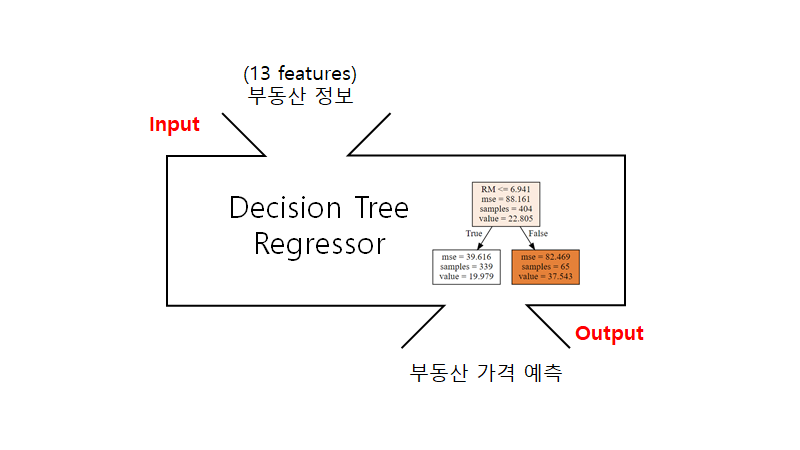

In [32]:
# load_boston() 명령어로 boston data set을 로드해 boston 변수에 담아보자.
boston = load_boston()

# 학습용(train) 그리고 테스트용(test)으로 8:2의 비율로 데이터 세트를 분리해보자.
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                   test_size = 0.2, shuffle = True)
                                                   

#### 2-2. Decision Tree Regression 모델 생성 및 시각화

`DecisionTreeRegressor(ciriterion, min_samples_split, min_samples_leaf, max_features, max_depth, max_leaf_nodes)`
* 사이킨런에서 제공하는 트리 기반의 회귀 모델

주요 parameter:
* `criterion`: 정보 균일도 측정 방법(mse/friedman_mse/mae/poisson), (기본 값="mse")
  * `mse`: 평균 제곱 오차
  * `friedman_mse`: 프리드먼 개선 점수와 평균 제곱 오차를 사용
  * `mae`: 터미널 노드의 중간값을 사용하여 L1 loss를 최소화
  * `poisson`: 포아송 분포 사용
* `min_samples_split`: 분할 되기 위해 필요한 최소한의 샘플 데이터 수, (기본 값=2)
* `min_samples_leaf`: 노드가 되기 위해 필요한 최소한의 데이터 수, (기본 값=1)
* `max_features`: 분할 시 고려해야 할 최대 피처 개수, (기본 값=None)
* `max_depth`: 트리의 최대 깊이, (기본 값=None)
* `max_leaf_nodes`: 말단 노드의 개수, (기본 값=None)

'min_samples_split', 'min_samples_leaf', 'max_depth'는 과적합을 제어하는 데에 사용되는 parameter이다. 

참고: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [33]:
# 결정트리분류 모델을 로드한 후 학습시켜보자.
tree_reg = DecisionTreeRegressor(criterion = 'mse',max_depth = 1,
                                random_state = 0).fit(X_train, y_train)

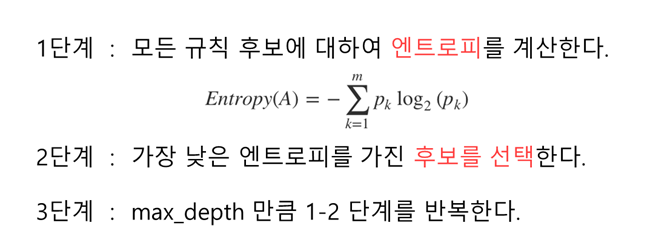

In [34]:
# 학습된 모델을 시각화하여 저장해보자.
export_graphviz(tree_reg, out_file = 'tree_reg.dot',
                feature_names = boston.feature_names, filled = True)

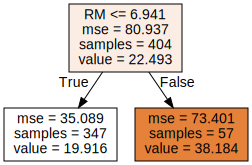

In [35]:
# 'tree.dot'으로 저장된 그래프를 로드해보자.
with open('tree_reg.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# 앞서 모델의 max_depth를 1로 설정해두었기 때문에 split이 1번만 일어난 것을 확인할 수 있다.

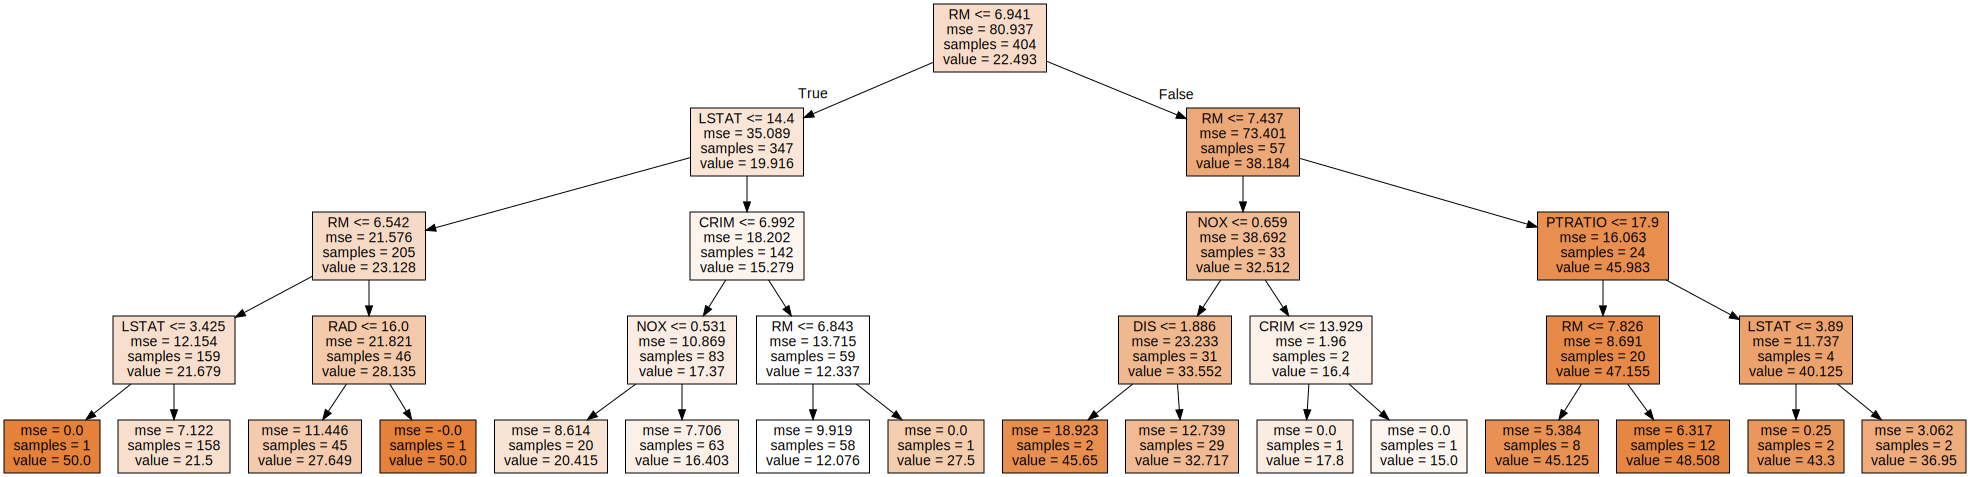

In [36]:
# 이번에는 max_depth를 6으로 설정한 뒤 시각화 해보자.
tree_reg = DecisionTreeRegressor(criterion = 'mse',max_depth = 4,
                                random_state = 0).fit(X_train, y_train)

export_graphviz(tree_reg, out_file = 'tree_reg1.dot',
                feature_names = boston.feature_names, filled = True)

with open('tree_reg1.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

* 규칙 노드의 개수가 증가하며 모델 복잡도가 높아진 것을 확인할 수 있다.

### 2-3. 과적합 제어

#### max_depth

In [37]:
# max_depth별로 score가 어떻게 변하는지 조회해보자.
max_depths = [1,2,3,4,5,6,7,8,9,10]
for depth in max_depths:
    tree_reg = DecisionTreeRegressor(criterion = 'mse',max_depth = depth,
                                random_state = 0).fit(X_train, y_train)
    pred = tree_reg.predict(X_test)
    accuracy = tree_reg.score(X_test, y_test)
    print('max_depth = {0}  score: {1:3f}'.format(depth, accuracy))

# max_depth=3에서 그나마 가장 좋은 성능을 보이고 있다.

max_depth = 1  score: 0.292517
max_depth = 2  score: 0.561087
max_depth = 3  score: 0.629077
max_depth = 4  score: 0.594589
max_depth = 5  score: 0.553248
max_depth = 6  score: 0.582561
max_depth = 7  score: 0.611570
max_depth = 8  score: 0.621776
max_depth = 9  score: 0.623709
max_depth = 10  score: 0.607097


* max_depth = 1, 10으로 설정된 모델을 더 자세히 살펴보자.

In [38]:
# max_depth = 1으로 설정하여 모델을 생성한 뒤 학습시켜보자.
tree_reg = DecisionTreeRegressor(criterion = 'mse',max_depth = 1,
                                random_state = 0).fit(X_train, y_train)

# max_depth를 1로 설정한 모델이 과적합되어 test에서 낮은 예측성능을 보이고 있다.
print('train score : {:.3f}'.format(model_dt.score(X_train, y_train)))
print('test score : {:.3f}'.format(model_dt.score(X_test, y_test)))

ValueError: ignored

In [39]:
# max_depth = 10으로 설정하여 모델을 생성한 뒤 학습시켜보자.
tree_reg = DecisionTreeRegressor(criterion = 'mse',max_depth = 10,
                                random_state = 0).fit(X_train, y_train)

# max_depth를 10로 설정한 모델이 과적합되어 test에서 낮은 예측성능을 보이고 있다.
print("train score : {:.3f}".format(tree_reg.score(X_train, y_train)))
print("test score : {:.3f}".format(tree_reg.score(X_test, y_test)))                    

train score : 0.990
test score : 0.607


- 결정트리는 가치지기를 사용함에도 과적합이 되는 경향이 있어 일반화 성능이 좋지않다. 이런 문제에 대한 대안으로 앙상블 방법이 있다.

## 3) 심화학습 (Pseudocode)

출처: https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/decision_tree.py

    엔트로피 계산 과정
    def entropy(y):
        1. 모든 클래스 각각의 빈도수를 카운트한다.
        2. 클래스별 빈도수를 클래스 개수로 나누어 p를 구한다.
        3. 엔트로피(= -총합(p * log2(p))를 return
    
    학습과정
    class Node:
        def is_leaf_Node():
            1. 자식 노드가 null이 아닐 때 True를 return
            
    class DecisionTree:

        def fit(X_data, y_data)
            1. _grow_tree() 함수 실행

        def grow_tree(X_data, y_data, depth):
            1. stopping criteria(max_depth, min_samples_split 등)을 설정하여 조건 중 하나라도 충족될 시 리프노드 return
            2. feature별 고유 인덱스 리스트(=feat_idxs)를 생성한다.
            3. greedy search: information gain을 기준으로 최적의 Split을 수행하고 Split 이후 생긴 자식 노드에도 이러한 과정을 반복한다.
                3-1. _best_criteria() 함수를 실행하여 엔트로피를 가장 낮추는 best_feature와 best_threshold를 도출한다.
                3-2. _split()함수를 실행하여 자식 노드 1, 2의 인덱스인 left_idxs와 right_idxs를 도출한다. 
                3-3. left_idxs에 해당하는 모든 feature와 y 데이터를 삽입하여 _grow_tree() 함수를 재귀적으로 실행하고, left 변수에 담는다. 
                3-4. right_idxs에 해당하는 모든 feature와 y 데이터를 삽입하여 _grow_tree() 재귀적으로 함수를 실행하고, right 변수에 담는다.
            4. best_feat, best_thresold(기준값 또는 분류규칙), right+left(자식 노드) 정보를 담은 새로운 node를 return


        def _best_criteria(X_data, y_data, feat_idxs):
            1. 각 feature에 대해서 가능한 모든 기준값(threshold)을 구한다.
            2. 기준값(threshold)를 삽입하여 _information_gain() 함수를 실행하여 gain 값을 도출한다.
            3. 새롭게 도출한 gain 값이 기존 best_gain보다 높다면,
                3-1. best_gain을 gain으로 업데이트 시킨다.
                3-2. split_idx를 새롭게 도출된 gain이 해당하는 feature의 인덱스로 업데이트 시킨다.
                3-3. split_threshold을 새롭게 도출된 gain이 해당하는 기준값(threshold)로 업데이트 시킨다.
            4. 모든 feature에 대하여 1-3을 반복하여 부모 노드와 자식 노드 간의 엔트로피를 가장 낮게 만드는 best feature와 threshold인 split_idx, split_threshold를 도출한다.
            5. split_idx, split_threshold을 return

        def _information_gain(y_data, X_column, split_threshold):
            1. entropy() 함수에 y_data를 삽입하여 부모 노드의 엔트로피를 계산한다.
            2. _split() 함수에 X_column, split_threshold를 삽입하여 자식 노드를 생성한다.
            3. n(=부모 노드 샘플의 개수), n_l(=자식 노드 1 샘플의 개수), n_r(=자식 노드 2 샘플의 개수), e_l(=자식 노드 1의 엔트로피), e_r(=자식 노드 2의 엔트로피)을 도출한다.
            4. 자식 노드의 가중평균 엔트로피(= (n_l/n) * e_l + (n_r/n) * e_r)을 계산한다.
            5. 엔트로피를 가장 낮게 만드는 정량화된 기준을 의미하는 정보획득량/information gain(=부모 노드의 엔트로피 - 자식 노드의 엔트로피)을 계산한다.
            6. (information) gain을 return

        def _split(X_column, split_threshold):
            1. 부모 노드를 기준 값(threshold)보다 작거나 동일한 데이터를 자식 노드 1으로 그리고 나머지를 자식 노드 2로 나눈다. 
                1-1. split_threshold 보다 작거나 동일한 X_column의 인덱스 위치를 전부 도출하여 left_idxs에 저장한다.
                1-2. split_threshold 보다 큰 X_column의 인덱스 위치를 전부 도출하여 right_idxs에 저장한다. 
            2. left_idxs, right_idxs를 return

        def _most_common_label(y_data):
            1. 가장 빈도수가 높은 label과 해당 label의 빈도수 return

        
    예측 과정
        def predict(X_data):
            1. 모드 x에 대하여 _traverse_tree() 함수 실행
            2. 함수 실행 결과를 담은 리스트와, root 정보 return
        
        def _traverse_tree(y_data):
            1. 현재 노드에 대하여 is_leaf_node() 함수를 실행하였을 때 결과가 True일 경우, 노드의 value를 return
            2. 현재 노드의 특성 인덱스(feat_index)가 기준 값(threshold)보다 값이 작을 시, _traverse_tree() 함수에 left 노드의 정보를 삽입하여 결과를 return 
            3. _treverse_tree() 함수에 right 노드의 정보를 삽입하여 결과를 return 


In [40]:
from collections import Counter

import numpy as np
   
#엔트로피 계산 과정
def entropy(y):
    # 1. 모든 클래스 각각의 빈도수를 카운트한다.
    hist = np.bincount(y)
    # 2. 클래스별 빈도수를 클래스 개수로 나누어 p를 구한다.
    ps = hist / len(y)
    # 3. 엔트로피(= -총합(p * log2(p))를 return
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

# 학습과정
class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
    # 1. 자식 노드가 null이 아닐 때 True를 return
    def is_leaf_node(self):
        return self.value is not None
            
        
class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    
    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # 1. stopping criteria(max_depth, min_samples_split 등)을 설정하여 조건 중 하나라도 충족될 시 리프노드 return
        if (
            depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)
        # 2. feature별 고유 인덱스 리스트(=feat_idxs)를 생성한다.
        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # 3. greedy search: information gain을 기준으로 최적의 split을 수행하고 split 이후 생긴 자식 노드에도 이 과정을 반복한다.
        # 3-1. _best_criteria() 함수를 실행하여 엔트로피를 가장 낮추는 best_feature와 best_threshold를 도출한다.
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
        # 3-2. _split()함수를 실행하여 자식 노드 1, 2의 인덱스인 left_idxs와 right_idxs를 도출한다.
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        # 3-3. left_idxs에 해당하는 모든 feature와 y 데이터를 삽입하여 재귀적으로 _grow_tree() 함수를 실행하고, left 변수에 담는다. 
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        # 3-4. right_idxs에 해당하는 모든 feature와 y 데이터를 삽입하여 재귀적으로 _grow_tree() 함수를 실행하고, right 변수에 담는다.
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        
        # 4. best_feat, best_thresold(기준값 또는 분류규칙), right+left(자식 노드) 정보를 담은 새로운 node를 return
        return Node(best_feat, best_thresh, left, right)


    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        # 1. 각 feature에 대해서 가능한 모든 기준값(threshold)을 구한다.
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
        # 2. 기준값(threshold)를 삽입하여 _information_gain() 함수를 실행하여 gain 값을 도출한다.
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)
        # 3. 새롭게 도출한 gain 값이 기존 best_gain보다 높다면,
                if gain > best_gain:
                    # 3-1. best_gain을 gain으로 업데이트 시킨다.
                    best_gain = gain
                    # 3-2. split_idx를 새롭게 도출된 gain이 해당하는 feature의 인덱스로 업데이트 시킨다.
                    split_idx = feat_idx
                    # 3-3. split_threshold을 새롭게 도출된 gain이 해당하는 기준값(threshold)로 업데이트 시킨다.
                    split_thresh = threshold
        # 4. 모든 feature에 대하여 1-3을 반복하여 부모 노드와 자식 노드 간의 엔트로피를 가장 낮게 만드는 best feature와 threshold인 split_idx, split_threshold를 도출한다.
        # 5. split_idx, split_threshold을 return
        return split_idx, split_thresh


    def _information_gain(self, y, X_column, split_thresh):
        # 1. entropy() 함수에 y_data를 삽입하여 부모 노드의 엔트로피를 계산한다.
        parent_entropy = entropy(y)

        # 2. _split() 함수에 X_column, split_threshold를 삽입하여 Split을 수행한다. 
        left_idxs, right_idxs = self._split(X_column, split_thresh)
    
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # 3. n(=부모 노드 샘플의 개수), n_l(=자식 노드 1 샘플의 개수), n_r(=자식 노드 2 샘플의 개수), e_l(=자식 노드 1의 엔트로피), e_r(=자식 노드 2의 엔트로피)을 도출한다.
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        # 4. 자식 노드의 가중평균 엔트로피(= (n_l/n) * e_l + (n_r/n) * e_r)을 계산한다.
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # 5. 엔트로피를 가장 낮게 만드는 정량화된 기준을 의미하는 정보획득량/information gain(=부모 노드의 엔트로피 - 자식 노드의 엔트로피)을 계산한다.
        ig = parent_entropy - child_entropy
        # 6. (information) gain을 return
        return ig


    def _split(self, X_column, split_thresh):
        # 1. 부모 노드를 기준 값(threshold)보다 작거나 동일한 데이터를 자식 노드 1으로 그리고 나머지를 자식 노드 2로 나눈다. 
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        # 2. left_idxs, right_idxs를 return
        return left_idxs, right_idxs

# 예측 과정
        
    def predict(self, X):
        # 1. 모드 x에 대하여 _traverse_tree() 함수 실행
        return np.array([self._traverse_tree(x, self.root) for x in X])
        
    def _traverse_tree(self, x, node):
        # 1. 현재 노드에 대하여 is_leaf_node() 함수를 실행하였을 때 결과가 True일 경우, 노드의 value를 return
        if node.is_leaf_node():
            return node.value
        # 2. 현재 노드의 특성 인덱스(feat_index)가 기준 값(threshold)보다 값이 작을 시, _traverse_tree() 함수에 left 노드의 정보를 삽입하여 결과를 return
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        # 3. _treverse_tree() 함수에 right 노드의 정보를 삽입하여 결과를 return 
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common


In [41]:
# Imports
from sklearn import datasets
from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

data = datasets.load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

clf = DecisionTree(max_depth=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy(y_test, y_pred)

print("Accuracy:", acc)

Accuracy: 0.9210526315789473
